In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import os
import geopy
from geopy import distance

In [4]:
os.chdir('datos_fao')

In [5]:
os.getcwd()

'c:\\Users\\marcr\\OneDrive\\Documents\\Data Science\\NDS\\fao-project\\datos_fao'

In [6]:
csvs = {'sua': 'SUA_Crops_Livestock_E_All_Data_(Normalized).csv', 'fbs': 'FoodBalanceSheets_E_All_Data_(Normalized).csv', 'trade': 'Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv', 'emissions': 'Environment_Emissions_intensities_E_All_Data_(Normalized).csv', 'pop': 'Population_E_All_Data_(Normalized).csv'}

## Supply Utilitzation Accounts (SUA)

### Importación del csv

Se importa y se hace una primera visualización del dataset

In [7]:
sua_df = pd.read_csv(csvs['sua'], header = 0, encoding='latin1')

In [8]:
sua_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,632,Alcohol non food,5510,Production,2014,2014,tonnes,0.0,Im
1,2,Afghanistan,632,Alcohol non food,5510,Production,2015,2015,tonnes,0.0,Im
2,2,Afghanistan,632,Alcohol non food,5510,Production,2016,2016,tonnes,0.0,Im
3,2,Afghanistan,632,Alcohol non food,5510,Production,2017,2017,tonnes,0.0,Im
4,2,Afghanistan,632,Alcohol non food,5510,Production,2018,2018,tonnes,0.0,Im


In [9]:
sua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509295 entries, 0 to 2509294
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 210.6+ MB


In [10]:
sua_df.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag            339383
dtype: int64

A priori todos los datos están bien formateados a nivel de tipos de variables, y no hay valores nulos (excepto en la columna de flag).

Cada columna descriptiva tiene su columna con un código numérico

La columna de flag significa lo siguiente:

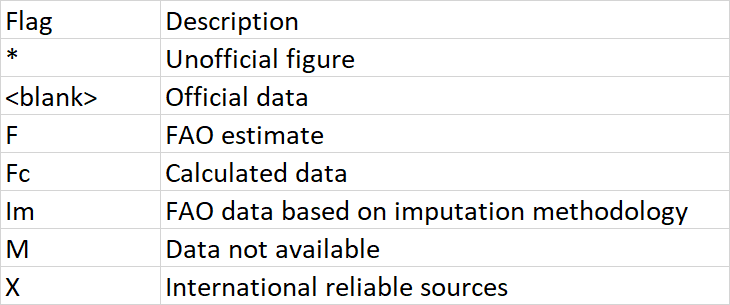


### Exploración de elementos únicos por columnas

#### Columna de Area

En esta columna se podrán seleccionar los países que se quieran analizar para el trabajo

In [11]:
sua_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', '

In [12]:
sua_df['Area'].nunique()

175

#### Columna de Item

En esta columna se podrán seleccionar los alimentos que se quieran analizar para el trabajo

In [13]:
print(sua_df['Item'].unique())

['Alcohol non food' 'Almonds shelled' 'Almonds, with shell'
 'Anise, badian, fennel, coriander' 'Apples' 'Apricots' 'Apricots, dry'
 'Areca nuts' 'Artichokes' 'Asparagus' 'Avocados' 'Bacon and ham'
 'Bambara beans' 'Bananas' 'Barley' 'Barley, pearled' 'Barley, pot'
 'Beans, dry' 'Beans, green' 'Beer of barley' 'Beer of maize'
 'Beer of millet' 'Beer of sorghum' 'Berries nes'
 'Beverages, distilled alcoholic' 'Beverages, fermented rice'
 'Beverages, fermented wheat' 'Bran, barley' 'Bran, buckwheat'
 'Bran, cereals nes' 'Bran, fonio' 'Bran, maize' 'Bran, millet'
 'Bran, mixed grains' 'Bran, oats' 'Bran, pulses' 'Bran, rice' 'Bran, rye'
 'Bran, sorghum' 'Bran, triticale' 'Bran, wheat' 'Brazil nuts, shelled'
 'Brazil nuts, with shell' 'Bread' 'Broad beans, horse beans, dry'
 'Buckwheat' 'Bulgur' 'Butter and ghee, sheep milk'
 'Butter of karite nuts' 'Butter, buffalo milk' 'Butter, cow milk'
 'Buttermilk, curdled, acidified milk' 'Cabbages and other brassicas'
 'Canary seed' 'Carrots and tu

In [14]:
sua_df['Item'].nunique()

451

#### Columna de Element

En esta columna se puede extraer cantidades según el uso del alimento. 

In [15]:
print(sua_df['Element'].unique())

['Production' 'Import Quantity' 'Export Quantity' 'Residuals'
 'Food supply quantity (tonnes)' 'Food supply (kcal/capita/day)'
 'Opening stocks' 'Stock Variation' 'Loss' 'Processed' 'Feed' 'Seed'
 'Other uses (non-food)' 'Food supply quantity (g/capita/day)'
 'Protein supply quantity (g/capita/day)'
 'Fat supply quantity (g/capita/day)' 'Calories/Year' 'Proteins/Year'
 'Fats/Year' 'Tourist consumption']


Elementos interesantes:

- Production
- Import Quantity
- Export Quantity
- Residuals
- Opening stocks
- Stock Variation
- Loss
- Processed
- Feed
- Seed
- Other Uses
- Tourist Consumption

Estaría bien profundizar qué significa cada una

#### Columna Year

Años disponibles: del 2014 al 2018

In [16]:
print(sua_df['Year'].unique())

[2014 2015 2016 2017 2018]


#### Columna Unit

De las columnas que nos interesan, todas estan en tonnes

In [17]:
print(sua_df['Unit'].unique())

['tonnes' 'kcal/capita/day' 'g/capita/day' 'million kcal']


## Food Balances

### Importación del csv

Se importa y se hace una primera visualización del dataset

In [18]:
fbs_df = pd.read_csv(csvs['fbs'], header = 0, encoding='latin1')

In [19]:
fbs_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2501,Population,511,Total Population - Both sexes,2014,2014,1000 persons,33371.0,*
1,2,Afghanistan,2501,Population,511,Total Population - Both sexes,2015,2015,1000 persons,34414.0,*
2,2,Afghanistan,2501,Population,511,Total Population - Both sexes,2016,2016,1000 persons,35383.0,*
3,2,Afghanistan,2501,Population,511,Total Population - Both sexes,2017,2017,1000 persons,36296.0,*
4,2,Afghanistan,2501,Population,511,Total Population - Both sexes,2018,2018,1000 persons,37172.0,*


In [20]:
fbs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439391 entries, 0 to 1439390
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Area Code     1439391 non-null  int64  
 1   Area          1439391 non-null  object 
 2   Item Code     1439391 non-null  int64  
 3   Item          1439391 non-null  object 
 4   Element Code  1439391 non-null  int64  
 5   Element       1439391 non-null  object 
 6   Year Code     1439391 non-null  int64  
 7   Year          1439391 non-null  int64  
 8   Unit          1439391 non-null  object 
 9   Value         1439391 non-null  float64
 10  Flag          1439391 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 120.8+ MB


In [21]:
fbs_df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

A priori todos los datos están bien formateados a nivel de tipos de variables, y no hay valores nulos (excepto en la columna de flag).

Cada columna descriptiva tiene su columna con un código numérico

La columna de flag significa lo siguiente:

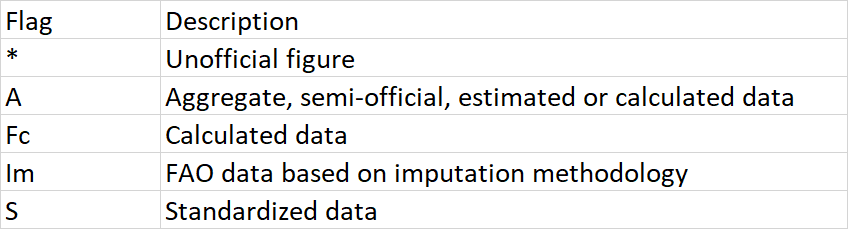

### Exploración por columnas

#### Columna de Item
No solo existen alimentos (también población) y hay menos productos que en SUA

In [22]:
fbs_df['Item'].unique()

array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
       'Cereals - Excluding Beer', 'Wheat and products',
       'Rice and products', 'Barley and products', 'Maize and products',
       'Rye and products', 'Oats', 'Millet and products',
       'Sorghum and products', 'Cereals, Other', 'Starchy Roots',
       'Cassava and products', 'Potatoes and products', 'Sweet potatoes',
       'Yams', 'Roots, Other', 'Sugar Crops', 'Sugar cane', 'Sugar beet',
       'Sugar & Sweeteners', 'Sugar non-centrifugal',
       'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Honey', 'Pulses',
       'Beans', 'Peas', 'Pulses, Other and products', 'Treenuts',
       'Nuts and products', 'Oilcrops', 'Soyabeans', 'Groundnuts',
       'Sunflower seed', 'Rape and Mustardseed', 'Cottonseed',
       'Coconuts - Incl Copra', 'Sesame seed', 'Palm kernels',
       'Olives (including preserved)', 'Oilcrops, Other',
       'Vegetable Oils', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed

In [23]:
sua_df['Item'].unique()

array(['Alcohol non food', 'Almonds shelled', 'Almonds, with shell',
       'Anise, badian, fennel, coriander', 'Apples', 'Apricots',
       'Apricots, dry', 'Areca nuts', 'Artichokes', 'Asparagus',
       'Avocados', 'Bacon and ham', 'Bambara beans', 'Bananas', 'Barley',
       'Barley, pearled', 'Barley, pot', 'Beans, dry', 'Beans, green',
       'Beer of barley', 'Beer of maize', 'Beer of millet',
       'Beer of sorghum', 'Berries nes', 'Beverages, distilled alcoholic',
       'Beverages, fermented rice', 'Beverages, fermented wheat',
       'Bran, barley', 'Bran, buckwheat', 'Bran, cereals nes',
       'Bran, fonio', 'Bran, maize', 'Bran, millet', 'Bran, mixed grains',
       'Bran, oats', 'Bran, pulses', 'Bran, rice', 'Bran, rye',
       'Bran, sorghum', 'Bran, triticale', 'Bran, wheat',
       'Brazil nuts, shelled', 'Brazil nuts, with shell', 'Bread',
       'Broad beans, horse beans, dry', 'Buckwheat', 'Bulgur',
       'Butter and ghee, sheep milk', 'Butter of karite nuts',
  

In [24]:
fbs_df[['Item', 'Item Code']].drop_duplicates().sort_values(by = 'Item Code')

,Item,Item Code
0,Population,2501
130,Wheat and products,2511
280,Barley and products,2513
355,Maize and products,2514
430,Rye and products,2515
...,...,...
5385,Animal fats,2946
5732,Milk - Excluding Butter,2948
5618,Eggs,2949
5872,"Fish, Seafood",2960


In [25]:
sua_df[['Item', 'Item Code']].drop_duplicates().sort_values(by = 'Item Code')

,Item,Item Code
8813,Wheat,15
2659,"Flour, wheat",16
789,"Bran, wheat",17
4138,Macaroni,18
3067,"Germ, wheat",19
...,...,...
1103,"Castor oil, hydrogenated (opal wax)",1273
5911,"Oil, boiled etc",1274
6057,"Oil, hydrogenated",1275
2240,Fatty acids,1276


In [26]:
fbs_df[fbs_df['Item Code'].isin(sua_df['Item Code'])]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag


Las tablas SUA y FBS no tienen los mismos items. De todas maneras, hay algunos alimentos que, aunque no tengan los mismos item codes ni el mismo nombre exacto, sí que coinciden.

#### Columna de Element
No solo existen alimentos (también población) y hay menos productos que en SUA

In [27]:
fbs_df['Element'].unique()

array(['Total Population - Both sexes', 'Domestic supply quantity',
       'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity', 'Feed',
       'Seed', 'Losses', 'Processing', 'Residuals', 'Food',
       'Food supply quantity (kg/capita/yr)', 'Other uses (non-food)',
       'Tourist consumption'], dtype=object)

Elementos interesantes comunes con SUA:

- Production
- Import Quantity
- Export Quantity
- Residuals
- Stock Variation
- Losses
- Processing
- Feed
- Seed
- Other uses (non-food)
- Tourist consumption

Elementos que están en SUA y no están en FBS

- Opening stocks

Elementos que están en FBS y no están en SUA

- Total Population - Both sexes

- Domestic supply quantity

Por las columnas comunes, se mira si los valores son iguales en las dos tablas. Efectivamente parece que coinciden (SUA da valores más exactos).

In [28]:
sua_df[(sua_df['Item'] == 'Oil, palm') & (sua_df['Area Code'] == 150) & (sua_df['Year Code'] == 2014)]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1610504,150,Netherlands,257,"Oil, palm",5113,Opening stocks,2014,2014,tonnes,273018.0,Im
1610509,150,Netherlands,257,"Oil, palm",5610,Import Quantity,2014,2014,tonnes,2439520.0,NaN
1610514,150,Netherlands,257,"Oil, palm",5071,Stock Variation,2014,2014,tonnes,303656.0,Im
1610519,150,Netherlands,257,"Oil, palm",5910,Export Quantity,2014,2014,tonnes,1118545.0,NaN
1610524,150,Netherlands,257,"Oil, palm",5023,Processed,2014,2014,tonnes,232017.0,Im
1610529,150,Netherlands,257,"Oil, palm",5165,Other uses (non-food),2014,2014,tonnes,765221.0,Im
1610534,150,Netherlands,257,"Oil, palm",5166,Residuals,2014,2014,tonnes,0.0,Im
1610539,150,Netherlands,257,"Oil, palm",5141,Food supply quantity (tonnes),2014,2014,tonnes,20081.0,Im
1610544,150,Netherlands,257,"Oil, palm",664,Food supply (kcal/capita/day),2014,2014,kcal/capita/day,29.0,Fc
1610549,150,Netherlands,257,"Oil, palm",665,Food supply quantity (g/capita/day),2014,2014,g/capita/day,3.0,Fc


In [29]:
fbs_df[(fbs_df['Item'] == 'Palm Oil') & (fbs_df['Area Code'] == 150) & (fbs_df['Year Code'] == 2014)]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
740600,150,Netherlands,2577,Palm Oil,5511,Production,2014,2014,1000 tonnes,0.00,Im
740605,150,Netherlands,2577,Palm Oil,5611,Import Quantity,2014,2014,1000 tonnes,2440.00,Im
740610,150,Netherlands,2577,Palm Oil,5072,Stock Variation,2014,2014,1000 tonnes,304.00,Im
740615,150,Netherlands,2577,Palm Oil,5911,Export Quantity,2014,2014,1000 tonnes,1119.00,Im
740620,150,Netherlands,2577,Palm Oil,5301,Domestic supply quantity,2014,2014,1000 tonnes,1017.00,S
740625,150,Netherlands,2577,Palm Oil,5131,Processing,2014,2014,1000 tonnes,232.00,Im
740630,150,Netherlands,2577,Palm Oil,5154,Other uses (non-food),2014,2014,1000 tonnes,765.00,Im
740635,150,Netherlands,2577,Palm Oil,5170,Residuals,2014,2014,1000 tonnes,0.00,Im
740640,150,Netherlands,2577,Palm Oil,5142,Food,2014,2014,1000 tonnes,20.00,Im
740645,150,Netherlands,2577,Palm Oil,645,Food supply quantity (kg/capita/yr),2014,2014,kg,1.19,Fc


In [30]:
sua_df[(sua_df['Item'] == 'Bananas') & (sua_df['Area Code'] == 203) & (sua_df['Year Code'] == 2014)]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2114495,203,Spain,486,Bananas,5510,Production,2014,2014,tonnes,365268.0,NaN
2114500,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,258849.0,NaN
2114505,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,98928.0,NaN
2114510,203,Spain,486,Bananas,5016,Loss,2014,2014,tonnes,81135.0,Im
2114515,203,Spain,486,Bananas,5023,Processed,2014,2014,tonnes,203952.0,Im
2114520,203,Spain,486,Bananas,5166,Residuals,2014,2014,tonnes,0.0,Im
2114524,203,Spain,486,Bananas,5141,Food supply quantity (tonnes),2014,2014,tonnes,240101.0,F
2114529,203,Spain,486,Bananas,664,Food supply (kcal/capita/day),2014,2014,kcal/capita/day,9.0,Fc
2114534,203,Spain,486,Bananas,665,Food supply quantity (g/capita/day),2014,2014,g/capita/day,14.0,Fc
2114539,203,Spain,486,Bananas,674,Protein supply quantity (g/capita/day),2014,2014,g/capita/day,0.0,Fc


In [31]:
fbs_df[(fbs_df['Item'] == 'Bananas') & (fbs_df['Area Code'] == 203) & (fbs_df['Year Code'] == 2014)]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
971378,203,Spain,2615,Bananas,5511,Production,2014,2014,1000 tonnes,365.00,Im
971383,203,Spain,2615,Bananas,5611,Import Quantity,2014,2014,1000 tonnes,259.00,Im
971388,203,Spain,2615,Bananas,5072,Stock Variation,2014,2014,1000 tonnes,0.00,Im
971393,203,Spain,2615,Bananas,5911,Export Quantity,2014,2014,1000 tonnes,99.00,Im
971398,203,Spain,2615,Bananas,5301,Domestic supply quantity,2014,2014,1000 tonnes,525.00,S
971403,203,Spain,2615,Bananas,5123,Losses,2014,2014,1000 tonnes,81.00,Im
971408,203,Spain,2615,Bananas,5131,Processing,2014,2014,1000 tonnes,204.00,Im
971413,203,Spain,2615,Bananas,5170,Residuals,2014,2014,1000 tonnes,0.00,Im
971418,203,Spain,2615,Bananas,5142,Food,2014,2014,1000 tonnes,240.00,Im
971423,203,Spain,2615,Bananas,645,Food supply quantity (kg/capita/yr),2014,2014,kg,5.13,Fc


#### Columna de Area

Se mira si hay las mismas áreas que en el dataset 'sua'

In [32]:
fbs_df['Area'].nunique()

211

In [33]:
sua_df['Area'].nunique()

175

In [34]:
fbs_df[~fbs_df['Area'].isin(sua_df['Area'])]['Area'].nunique()

36

In [35]:
fbs_df[~fbs_df['Area'].isin(sua_df['Area'])]['Area'].unique()

array(['China', 'World', 'Africa', 'Eastern Africa', 'Middle Africa',
       'Northern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union (28)',
       'European Union (27)', 'Least Developed Countries',
       'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries'], dtype=object)

In [36]:
sua_df[sua_df['Area'].str.contains('China')]['Area'].unique()

array(['China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of'], dtype=object)

En el dataset de Food Balance Sheets, se añaden regiones a la columna (aparte de los países). También existe la diferencia que en Supply Utilization Accounts, China está dividida por regiones, mientras que en Food Balance Sheets China es una sola región.

#### Columna Year

Años disponibles: del 2014 al 2018

In [37]:
fbs_df['Year Code'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int64)

## Trade Matrix

### Importación del csv

Se importa y se hace una primera visualización del dataset

In [38]:
trade_df = pd.read_csv(csvs['trade'], header = 0, encoding='latin1')

In [39]:
trade_df.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5910,Export Quantity,2016,2016,tonnes,3.0,*
1,2,Afghanistan,4,Algeria,230,"Cashew nuts, shelled",5922,Export Value,2016,2016,1000 US$,23.0,*
2,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2015,2015,1000 US$,1.0,*
3,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2016,2016,1000 US$,1.0,*
4,2,Afghanistan,4,Algeria,1293,Crude materials,5922,Export Value,2017,2017,1000 US$,5.0,R


In [40]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39473952 entries, 0 to 39473951
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reporter Country Code  int64  
 1   Reporter Countries     object 
 2   Partner Country Code   int64  
 3   Partner Countries      object 
 4   Item Code              int64  
 5   Item                   object 
 6   Element Code           int64  
 7   Element                object 
 8   Year Code              int64  
 9   Year                   int64  
 10  Unit                   object 
 11  Value                  float64
 12  Flag                   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.8+ GB


In [41]:
trade_df.isnull().sum()

Reporter Country Code           0
Reporter Countries              0
Partner Country Code            0
Partner Countries               0
Item Code                       0
Item                            0
Element Code                    0
Element                         0
Year Code                       0
Year                            0
Unit                            0
Value                           1
Flag                     38331195
dtype: int64

In [42]:
trade_df[trade_df['Value'].isnull()]

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
8954909,167,Czechia,150,Netherlands,866,Cattle,5908,Export Quantity,1995,1995,Head,NaN,M


Flags

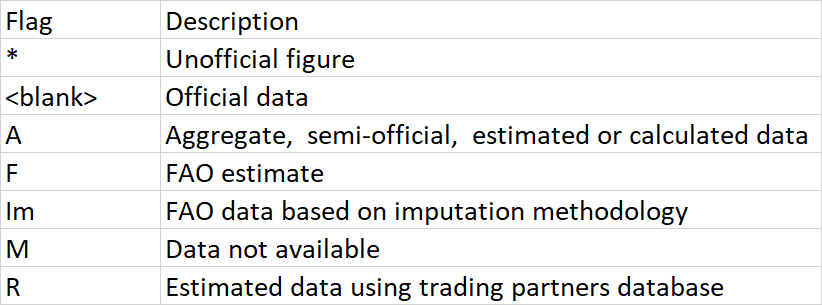

### Exploración por columnas

#### Columna Item

Para ver qué alimentos hay i como cuadran con el resto de tablas:

In [43]:
trade_df['Item'].unique()

array(['Cashew nuts, shelled', 'Crude materials', 'Raisins', 'Spices nes',
       'Food prep nes', 'Maize', 'Meat, chicken', 'Milk, whole dried',
       'Sugar refined', 'Cigarettes', 'Plums dried (prunes)',
       'Almonds shelled', 'Almonds, with shell', 'Apricots',
       'Apricots, dry', 'Beverages, non alcoholic', 'Chick peas',
       'Cream fresh', 'Figs dried', 'Fruit, dried nes',
       'Fruit, prepared nes', 'Meat, cattle, boneless (beef & veal)',
       'Meat, sheep', 'Milk, skimmed dried', 'Nuts nes',
       'Nuts, prepared (exc. groundnuts)', 'Oilseeds nes', 'Pastry',
       'Rice, milled', 'Rice, paddy (rice milled equivalent)',
       'Sugar confectionery', 'Tallow', 'Vegetables, frozen',
       'Vegetables, preserved nes', 'Walnuts, shelled', 'Whey, dry',
       'Yoghurt, concentrated or not', 'Cheese, processed',
       'Cheese, whole cow milk', 'Chocolate products nes',
       'Groundnuts, prepared', 'Lactose', 'Lemons and limes',
       'Pistachios', 'Sugar Raw Centri

Se compara la columna de Item Code con el dataset SUA, ya que con FB ya sabemos que no coinciden (en este último los códigos empiezan por 2000 para arriba)

In [44]:
np.sort(trade_df['Item Code'].unique())

array([  15,   16,   17,   18,   20,   21,   22,   27,   28,   29,   30,
         31,   32,   36,   37,   38,   39,   41,   44,   46,   49,   51,
         56,   57,   58,   59,   60,   61,   71,   75,   76,   79,   81,
         83,   85,   89,   91,   92,   94,   97,  101,  103,  104,  109,
        110,  111,  113,  114,  115,  116,  117,  118,  120,  122,  125,
        126,  128,  129,  149,  150,  157,  160,  161,  162,  163,  164,
        165,  166,  167,  168,  169,  171,  172,  173,  176,  181,  187,
        191,  201,  203,  205,  212,  217,  220,  221,  222,  223,  224,
        225,  226,  229,  230,  231,  232,  233,  234,  235,  236,  237,
        238,  239,  240,  243,  244,  245,  246,  247,  249,  250,  251,
        252,  253,  257,  258,  259,  260,  261,  262,  263,  264,  266,
        267,  268,  269,  270,  271,  272,  274,  281,  282,  289,  290,
        291,  292,  294,  295,  296,  297,  306,  311,  313,  314,  329,
        331,  332,  333,  334,  335,  338,  339,  3

In [45]:
trade_df['Item Code'].nunique()

426

In [46]:
np.sort(sua_df['Item Code'].unique())

array([  15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   26,
         27,   28,   29,   31,   32,   33,   34,   35,   36,   38,   39,
         41,   44,   45,   46,   47,   48,   49,   50,   51,   56,   57,
         58,   59,   60,   63,   64,   66,   71,   72,   73,   75,   76,
         77,   79,   80,   81,   82,   83,   84,   85,   86,   89,   90,
         91,   92,   94,   95,   96,   97,   98,   99,  101,  103,  104,
        105,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,
        118,  119,  121,  122,  125,  126,  127,  128,  129,  135,  136,
        137,  149,  150,  151,  154,  155,  156,  157,  160,  161,  162,
        163,  164,  165,  166,  167,  168,  172,  173,  175,  176,  181,
        187,  191,  195,  197,  201,  203,  205,  210,  211,  212,  213,
        216,  217,  220,  221,  222,  223,  224,  225,  226,  229,  230,
        231,  232,  233,  234,  235,  236,  237,  239,  240,  241,  242,
        243,  244,  246,  247,  249,  250,  251,  2

In [47]:
sua_df['Item Code'].nunique()

451

Se buscan los códigos coincidentes entre el dataset SUA y TRADE

In [48]:
sua_df[sua_df['Item Code'].isin(trade_df['Item Code'])]['Item Code'].nunique()

317

In [49]:
item_code_sua_trade = np.sort(sua_df[sua_df['Item Code'].isin(trade_df['Item Code'])]['Item Code'].unique())
item_code_sua_trade

array([  15,   16,   17,   18,   20,   21,   22,   27,   28,   29,   31,
         32,   36,   38,   39,   41,   44,   46,   49,   51,   56,   57,
         58,   59,   60,   71,   75,   76,   79,   81,   83,   85,   89,
         91,   92,   94,   97,  101,  103,  104,  109,  110,  111,  113,
        114,  115,  116,  117,  118,  122,  125,  126,  128,  129,  149,
        150,  157,  160,  161,  162,  163,  164,  165,  166,  167,  168,
        172,  173,  176,  181,  187,  191,  201,  203,  205,  212,  217,
        220,  221,  222,  223,  224,  225,  226,  229,  230,  231,  232,
        233,  234,  235,  236,  237,  239,  240,  243,  244,  246,  247,
        249,  250,  251,  252,  257,  258,  260,  261,  262,  263,  264,
        266,  267,  268,  270,  271,  274,  281,  289,  290,  292,  295,
        296,  297,  306,  311,  313,  329,  331,  333,  334,  339,  340,
        358,  366,  367,  372,  373,  388,  390,  391,  392,  393,  394,
        397,  399,  401,  402,  403,  406,  407,  4

In [50]:
sua_df[sua_df['Item Code'].isin(item_code_sua_trade)]['Item'].nunique()

317

#### Columna Year

Años disponibles: 1986-2019

In [51]:
np.sort(trade_df['Year Code'].unique())

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

#### Columna de Element

Se dispone de las exportaciones e importaciones, tanto en cantidad como en valor monetario

In [52]:
trade_df['Element'].unique()

array(['Export Quantity', 'Export Value', 'Import Quantity',
       'Import Value'], dtype=object)

#### Columnas de Reporter Country y Partner Country

Se estudia más en profundidad qué significa la columna Reporter y la columna Partner.
En las columnas de abajo se especifica que el Reporter Country o Partner Country sea Spain, Exportaciones, Bananas y año 2014:

In [53]:
trade_df[((trade_df['Reporter Country Code'] == 203) | (trade_df['Partner Country Code'] == 203)) & (trade_df['Element Code'] == 5910) & (trade_df['Year Code'] == 2014) & (trade_df['Item'] == 'Bananas')]

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
3121110,255,Belgium,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,7238.0,NaN
3581964,23,Belize,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,4991.0,*
4268920,21,Brazil,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,4077.0,NaN
4947581,32,Cameroon,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,61.0,NaN
7708297,44,Colombia,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,6385.0,NaN
7976300,48,Costa Rica,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,63669.0,NaN
9693037,54,Denmark,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,0.0,NaN
9973522,58,Ecuador,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,1853.0,NaN
12339487,68,France,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,88797.0,NaN
14007066,79,Germany,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,1.0,NaN


En las columnas de abajo se especifica que el Reporter Country o Partner Country sea Spain, Importaciones, Bananas y año 2014:

In [54]:
trade_df[((trade_df['Reporter Country Code'] == 203) | (trade_df['Partner Country Code'] == 203)) & (trade_df['Element Code'] == 5610) & (trade_df['Year Code'] == 2014) & (trade_df['Item'] == 'Bananas')]

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1776065,11,Austria,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,44.0,NaN
2507896,57,Belarus,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,39.0,NaN
5564082,33,Canada,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,0.0,NaN
6353698,96,"China, Hong Kong SAR",203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,26.0,NaN
7708273,44,Colombia,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,3.0,NaN
9076760,167,Czechia,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,159.0,NaN
9693006,54,Denmark,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,40.0,NaN
12339426,68,France,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,43522.0,NaN
14007011,79,Germany,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,2910.0,NaN
14833386,84,Greece,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,2.0,NaN


Comparando las siguientes filas se ve la siguiente incoherencia:

In [55]:
trade_df.iloc[[32084414]]

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
32084414,203,Spain,106,Italy,486,Bananas,5910,Export Quantity,2014,2014,tonnes,355.0,NaN


In [56]:
trade_df.iloc[[18530314]]

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
18530314,106,Italy,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,1625.0,NaN


La cantidad de Bananas que España reporta que ha exportado a Italia no coincide con la cantidad que Italia reporta que ha importado de España.
Esto es normal ya que se trata de un valor difícil de precisar y cada aduana probablemente lo determina de maneras distintas

Con tal de ver si estos valores coinciden con los de la matriz SUA, se corren las siguientes lineas de código:

In [57]:
#Suma todas las exportaciones de bananas del 2014 que tienen como reporter country a España
trade_df[(trade_df['Reporter Country Code'] == 203) & (trade_df['Element Code'] == 5910) & (trade_df['Year Code'] == 2014) & \
         (trade_df['Item'] == 'Bananas')]['Value'].sum()

98275.0

In [58]:
#Suma todas las exportaciones de bananas del 2014 que tienen como partner country a España
trade_df[(trade_df['Partner Country Code'] == 203) & (trade_df['Element Code'] == 5910) & (trade_df['Year Code'] == 2014) & \
         (trade_df['Item'] == 'Bananas')]['Value'].sum()

234326.0

In [59]:
#Valor de exportaciones de bananas del 2014 para España en el dataset SUA
sua_df[(sua_df['Area Code'] == 203) & (sua_df['Element Code'] == 5910) & (sua_df['Year Code'] == 2014) & (sua_df['Item'] == 'Bananas')]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2114505,203,Spain,486,Bananas,5910,Export Quantity,2014,2014,tonnes,98928.0,NaN


In [60]:
#Suma todas las importaciones de bananas del 2014 que tienen como reporter country a España
trade_df[(trade_df['Reporter Country Code'] == 203) & (trade_df['Element Code'] == 5610) & (trade_df['Year Code'] == 2014) & \
         (trade_df['Item'] == 'Bananas')]['Value'].sum()

258848.0

In [61]:
#Suma todas las importaciones de bananas del 2014 que tienen como partner country a España
trade_df[(trade_df['Partner Country Code'] == 203) & (trade_df['Element Code'] == 5610) & (trade_df['Year Code'] == 2014) & \
         (trade_df['Item'] == 'Bananas')]['Value'].sum()

141699.0

In [62]:
#Valor de importaciones de bananas del 2014 para España en el dataset SUA
sua_df[(sua_df['Area Code'] == 203) & (sua_df['Element Code'] == 5610) & (sua_df['Year Code'] == 2014) & (sua_df['Item'] == 'Bananas')]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2114500,203,Spain,486,Bananas,5610,Import Quantity,2014,2014,tonnes,258849.0,NaN


Con estas lineas se confirma que el pais de referencia para marcar si un intercambio es una importación o exportación es quien reporta el intercambio. Es decir

* Cando la columna element es import, el reporter country es quien importa la cantidad y el partner country es quien la exporta
* Cuando la columna element es export, el reporter country es quien exporta la cantidad y el partner country es quin la importa

Además, se ha comprovado que estos valores coinciden con los de la tabla SUA. 



Cantidad de países únicos en cada columna:

In [63]:
trade_df['Reporter Countries'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Faroe Islands', 'Fiji',
       'Finl

In [64]:
trade_df['Reporter Countries'].nunique()

180

In [65]:
trade_df['Partner Countries'].unique()

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China, Hong Kong SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',


In [66]:
trade_df['Partner Countries'].nunique()

222

#### Columna de Unit

In [67]:
trade_df['Unit'].unique()

array(['tonnes', '1000 US$', 'Head', 'No', '1000 Head'], dtype=object)

In [68]:
trade_df[trade_df['Unit'] == 'No']['Item'].unique()

array(['Beehives'], dtype=object)

## Emissions intensisities

Importación del dataset

In [69]:
emissions_df = pd.read_csv(csvs['emissions'], header = 0, encoding = 'latin1') 

In [70]:
emissions_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1718,Cereals excluding rice,71761,Emissions intensity,1961,1961,kg CO2eq/kg product,0.1191,Fc
1,2,Afghanistan,1718,Cereals excluding rice,71761,Emissions intensity,1962,1962,kg CO2eq/kg product,0.1209,Fc
2,2,Afghanistan,1718,Cereals excluding rice,71761,Emissions intensity,1963,1963,kg CO2eq/kg product,0.1261,Fc
3,2,Afghanistan,1718,Cereals excluding rice,71761,Emissions intensity,1964,1964,kg CO2eq/kg product,0.1214,Fc
4,2,Afghanistan,1718,Cereals excluding rice,71761,Emissions intensity,1965,1965,kg CO2eq/kg product,0.1204,Fc


In [71]:
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383574 entries, 0 to 383573
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     383574 non-null  int64  
 1   Area          383574 non-null  object 
 2   Item Code     383574 non-null  int64  
 3   Item          383574 non-null  object 
 4   Element Code  383574 non-null  int64  
 5   Element       383574 non-null  object 
 6   Year Code     383574 non-null  int64  
 7   Year          383574 non-null  int64  
 8   Unit          383574 non-null  object 
 9   Value         383574 non-null  float64
 10  Flag          342717 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 32.2+ MB


In [72]:
emissions_df.isnull().sum()

Area Code           0
Area                0
Item Code           0
Item                0
Element Code        0
Element             0
Year Code           0
Year                0
Unit                0
Value               0
Flag            40857
dtype: int64

Flags:

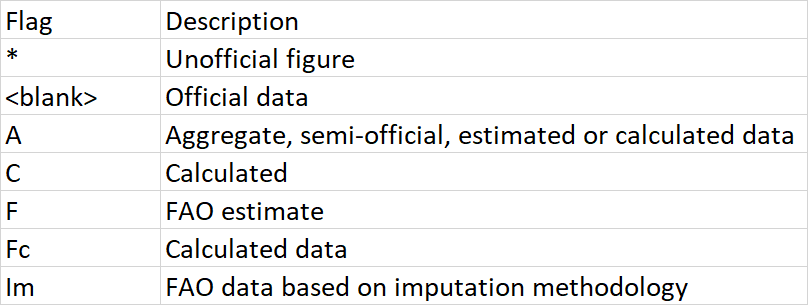

### Exploración por columnas

#### Columna de Area

In [73]:
emissions_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibo

In [74]:
emissions_df['Area'].nunique()

262

#### Columna de Item
Se puede comprovar que existen muchos menos alimentos que en los otros datsets

In [75]:
emissions_df['Item'].unique()

array(['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle',
       'Milk, whole fresh cow', 'Meat, goat', 'Milk, whole fresh goat',
       'Meat, sheep', 'Milk, whole fresh sheep',
       'Milk, whole fresh camel', 'Meat, chicken', 'Eggs, hen, in shell',
       'Milk, whole fresh buffalo', 'Meat, pig', 'Meat, buffalo'],
      dtype=object)

In [76]:
emissions_df['Item'].nunique()

14

In [77]:
np.sort(emissions_df['Item Code'].unique())

array([  27,  867,  882,  947,  951,  977,  982, 1017, 1020, 1035, 1058,
       1062, 1130, 1718], dtype=int64)

#### Columna de Element
Existen las emisisones de CO2 por unidad de peso y totales. También existe la producción del alimento en cuestión, pero no nos interesa

In [78]:
emissions_df['Element'].unique()

array(['Emissions intensity', 'Emissions (CO2eq)', 'Production'],
      dtype=object)

#### Columna de Year

In [79]:
emissions_df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

#### Columna de Unit

In [80]:
emissions_df['Unit'].unique()

array(['kg CO2eq/kg product', 'gigagrams', 'tonnes'], dtype=object)

## Population

Importación del dataset

In [81]:
pop_df = pd.read_csv(csvs['pop'], header = 0, encoding = 'latin1')

In [82]:
pop_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.118,X,NaN
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7840.156,X,NaN
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7935.997,X,NaN
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8039.694,X,NaN
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8151.317,X,NaN


In [83]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160411 entries, 0 to 160410
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     160411 non-null  int64  
 1   Area          160411 non-null  object 
 2   Item Code     160411 non-null  int64  
 3   Item          160411 non-null  object 
 4   Element Code  160411 non-null  int64  
 5   Element       160411 non-null  object 
 6   Year Code     160411 non-null  int64  
 7   Year          160411 non-null  int64  
 8   Unit          160411 non-null  object 
 9   Value         160411 non-null  float64
 10  Flag          160411 non-null  object 
 11  Note          0 non-null       float64
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ MB


In [84]:
pop_df.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag                 0
Note            160411
dtype: int64

### Exploración por columnas

#### Columna de Area
Incluye grupos de países y regiones

In [85]:
pop_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Czecho

In [86]:
pop_df['Area'].nunique()

279

#### Columna de Item
Solo tiene un solo tipo de valor

In [87]:
pop_df['Item'].unique()

array(['Population - Est. & Proj.'], dtype=object)

#### Columna de Element
Se refiere a las distintas clasificaciones de la población

In [88]:
pop_df['Element'].unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

#### Columna de Year

In [89]:
pop_df['Year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,
       2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037,
       2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059,
       2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070,
       2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081,
       2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092,
       2093, 2094, 2095, 2096, 2097, 2098, 2099, 21

#### Columna de Unit

In [90]:
pop_df['Unit'].unique()

array(['1000 persons'], dtype=object)

## Coincidencias entre columnnas
Se buscarán registros coincidentes entre columnas de distintas tablas

### Columna de Year
Coinciden los años de 2014 al 2017

In [91]:
codes_años_comunes = set(sua_df['Year']) & set(trade_df['Year']) & set(emissions_df['Year']) & set(pop_df['Year'])
codes_años_comunes

{2014, 2015, 2016, 2017}

In [92]:
sua_df_format = sua_df.copy()
trade_df_format = trade_df.copy()
emissions_df_format = emissions_df.copy()
pop_df_format = pop_df.copy()

In [93]:
# sua_df_format.drop(index = sua_df_format[~sua_df_format['Year'].isin(codes_años_comunes)].index, inplace = True)
sua_df_format = sua_df_format[sua_df_format['Year'].isin(codes_años_comunes)]
sua_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013477 entries, 0 to 2509293
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 184.3+ MB


In [94]:
# trade_df_format.drop(index = trade_df_format[~trade_df_format['Year'].isin(codes_años_comunes)].index, inplace = True)
trade_df_format = trade_df_format[trade_df_format['Year'].isin(codes_años_comunes)]
trade_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7450395 entries, 0 to 39473874
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reporter Country Code  int64  
 1   Reporter Countries     object 
 2   Partner Country Code   int64  
 3   Partner Countries      object 
 4   Item Code              int64  
 5   Item                   object 
 6   Element Code           int64  
 7   Element                object 
 8   Year Code              int64  
 9   Year                   int64  
 10  Unit                   object 
 11  Value                  float64
 12  Flag                   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 795.8+ MB


In [95]:
# emissions_df_format.drop(index = emissions_df_format[~emissions_df_format['Year'].isin(codes_años_comunes)].index, inplace = True)
emissions_df_format = emissions_df_format[emissions_df_format['Year'].isin(codes_años_comunes)]
emissions_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28872 entries, 53 to 383573
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     28872 non-null  int64  
 1   Area          28872 non-null  object 
 2   Item Code     28872 non-null  int64  
 3   Item          28872 non-null  object 
 4   Element Code  28872 non-null  int64  
 5   Element       28872 non-null  object 
 6   Year Code     28872 non-null  int64  
 7   Year          28872 non-null  int64  
 8   Unit          28872 non-null  object 
 9   Value         28872 non-null  float64
 10  Flag          25836 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ MB


In [96]:
# pop_df_format.drop(index = pop_df_format[~pop_df_format['Year'].isin(codes_años_comunes)].index, inplace = True)
pop_df_format = pop_df_format[pop_df_format['Year'].isin(codes_años_comunes)]
pop_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5132 entries, 64 to 160377
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     5132 non-null   int64  
 1   Area          5132 non-null   object 
 2   Item Code     5132 non-null   int64  
 3   Item          5132 non-null   object 
 4   Element Code  5132 non-null   int64  
 5   Element       5132 non-null   object 
 6   Year Code     5132 non-null   int64  
 7   Year          5132 non-null   int64  
 8   Unit          5132 non-null   object 
 9   Value         5132 non-null   float64
 10  Flag          5132 non-null   object 
 11  Note          0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 521.2+ KB


### Columna de Area / Reporter Country

In [97]:
# Se guardan los codigos de los países que aparecen en todos los datasets
codes_paises_comunes = set(sua_df['Area Code']) & set(trade_df['Reporter Country Code']) & set(emissions_df['Area Code']) & set(pop_df['Area Code']) & set(trade_df['Partner Country Code'])
codes_paises_comunes

{1,
 2,
 3,
 4,
 8,
 9,
 10,
 11,
 12,
 14,
 16,
 19,
 20,
 21,
 23,
 25,
 27,
 32,
 33,
 35,
 37,
 38,
 40,
 41,
 44,
 45,
 46,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 63,
 66,
 67,
 68,
 70,
 72,
 73,
 74,
 75,
 79,
 80,
 81,
 83,
 84,
 86,
 89,
 90,
 91,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 121,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 141,
 143,
 146,
 147,
 149,
 150,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 162,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 181,
 183,
 184,
 185,
 188,
 189,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 202,
 203,
 207,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 220,
 221,
 222,
 223,
 225,
 226,
 229,
 230,
 231,
 233,
 234,
 236,
 238,
 249,
 251,
 255,
 256,
 272,
 273}

In [98]:
# Se guardan los países del dataset SUA que no aparecen en la lista de países no comunes
sua_paises_no_comunes = sua_df[~sua_df['Area Code'].isin(codes_paises_comunes)]['Area'].unique()
sua_paises_no_comunes

array(['Angola', 'Chad', "Democratic People's Republic of Korea",
       'Dominican Republic', 'Guinea-Bissau', 'Haiti', 'Iraq',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Mozambique', 'Myanmar', 'Samoa', 'Sudan', 'Tajikistan',
       'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Viet Nam'],
      dtype=object)

In [99]:
# Se comprueba que la lista de paises comunes sumada a la lista de países no comunes del dataset SUA
# es igual a la cantidad de países únicos del datset SUA
len(sua_df['Area'].unique()) == len(codes_paises_comunes) + len(sua_paises_no_comunes)

True

In [100]:
#Se eliminan los países no comunes del dataset SUA format
sua_df_format = sua_df_format[sua_df_format['Area Code'].isin(codes_paises_comunes)]
sua_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819484 entries, 0 to 2509293
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 166.6+ MB


In [101]:
# Se guardan los países del dataset trade que no aparecen en la lista de países no comunes (columna reporter countries)
trade_paises_no_comunes = trade_df[~trade_df['Reporter Country Code'].isin(codes_paises_comunes)]['Reporter Countries'].unique()
trade_paises_no_comunes

array(['Bahrain', 'Belgium-Luxembourg', 'Bhutan', 'Brunei Darussalam',
       'Burundi', 'Cook Islands', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Ethiopia PDR',
       'Faroe Islands', 'French Guyana', 'Guadeloupe', 'Libya',
       'Martinique', 'Qatar', 'Réunion', 'Serbia and Montenegro',
       'Singapore', 'Sudan (former)', 'Syrian Arab Republic', 'Tonga',
       'Tuvalu', 'USSR', 'Yugoslav SFR'], dtype=object)

In [102]:
# Se comprueba que la lista de paises comunes sumada a la lista de países no comunes del dataset trade
# es igual a la cantidad de países únicos del datset trade
len(trade_df['Reporter Countries'].unique()) == len(codes_paises_comunes) + len(trade_paises_no_comunes)

True

In [103]:
#Se eliminan los países no comunes del dataset trade format
trade_df_format = trade_df_format[trade_df_format['Reporter Country Code'].isin(codes_paises_comunes)]
trade_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159276 entries, 0 to 39473874
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reporter Country Code  int64  
 1   Reporter Countries     object 
 2   Partner Country Code   int64  
 3   Partner Countries      object 
 4   Item Code              int64  
 5   Item                   object 
 6   Element Code           int64  
 7   Element                object 
 8   Year Code              int64  
 9   Year                   int64  
 10  Unit                   object 
 11  Value                  float64
 12  Flag                   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 764.7+ MB


In [104]:
# Se guardan los países del dataset emissions que no aparecen en la lista de países no comunes
emissions_paises_no_comunes = emissions_df[~emissions_df['Area Code'].isin(codes_paises_comunes)]['Area'].unique()
emissions_paises_no_comunes

array(['American Samoa', 'Angola', 'Bahrain', 'Belgium-Luxembourg',
       'Bermuda', 'Bhutan', 'British Virgin Islands', 'Brunei Darussalam',
       'Burundi', 'Cayman Islands', 'Chad', 'China', 'Cook Islands',
       'Czechoslovakia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia PDR',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana',
       'Greenland', 'Guadeloupe', 'Guam', 'Guinea-Bissau', 'Haiti',
       'Iraq', "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Libya', 'Liechtenstein', 'Martinique',
       'Micronesia (Federated States of)', 'Montserrat', 'Mozambique',
       'Myanmar', 'Nauru', 'Netherlands Antilles (former)', 'Niue',
       'Pacific Islands Trust Territory', 'Palestine', 'Puerto Rico',
       'Qatar', 'Réunion', 'Saint Pierre and Miquelon', 'Samoa',
       'Serbia and Montenegro', 'Singapore', 'Somalia', 'South Sudan

In [105]:
# Se comprueba que la lista de paises comunes sumada a la lista de países no comunes del dataset emissions
# es igual a la cantidad de países únicos del datset emissions
len(emissions_df['Area'].unique()) == len(codes_paises_comunes) + len(emissions_paises_no_comunes)

True

In [106]:
#Se eliminan los países no comunes del dataset SUA format
emissions_df_format = emissions_df_format[emissions_df_format['Area Code'].isin(codes_paises_comunes)]
emissions_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17832 entries, 53 to 308270
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     17832 non-null  int64  
 1   Area          17832 non-null  object 
 2   Item Code     17832 non-null  int64  
 3   Item          17832 non-null  object 
 4   Element Code  17832 non-null  int64  
 5   Element       17832 non-null  object 
 6   Year Code     17832 non-null  int64  
 7   Year          17832 non-null  int64  
 8   Unit          17832 non-null  object 
 9   Value         17832 non-null  float64
 10  Flag          15018 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [107]:
# Se guardan los países del dataset population que no aparecen en la lista de países no comunes
pop_paises_no_comunes = pop_df[~pop_df['Area Code'].isin(codes_paises_comunes)]['Area'].unique()
pop_paises_no_comunes

array(['American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Aruba',
       'Bahrain', 'Belgium-Luxembourg', 'Bermuda', 'Bhutan',
       'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands',
       'Brunei Darussalam', 'Burundi', 'Cayman Islands', 'Chad',
       'Channel Islands', 'China', 'Cook Islands', 'Curaçao',
       'Czechoslovakia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia PDR',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana',
       'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Guinea-Bissau',
       'Haiti', 'Holy See', 'Iraq', 'Isle of Man',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Marshall Islands', 'Martinique', 'Mayotte',
       'Micronesia (Federated States of)', 'Monaco', 'Montserrat',
       'Mozambique', 'Myanmar', 'Nauru', 'Netherlands Antilles (former)',
       'Niu

In [108]:
# Se comprueba que la lista de paises comunes sumada a la lista de países no comunes del dataset population
# es igual a la cantidad de países únicos del datset population
len(pop_df['Area'].unique()) == len(codes_paises_comunes) + len(pop_paises_no_comunes)

True

In [109]:
#Se eliminan los países no comunes del dataset SUA format
pop_df_format = pop_df_format[pop_df_format['Area Code'].isin(codes_paises_comunes)]
pop_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 64 to 138317
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     3104 non-null   int64  
 1   Area          3104 non-null   object 
 2   Item Code     3104 non-null   int64  
 3   Item          3104 non-null   object 
 4   Element Code  3104 non-null   int64  
 5   Element       3104 non-null   object 
 6   Year Code     3104 non-null   int64  
 7   Year          3104 non-null   int64  
 8   Unit          3104 non-null   object 
 9   Value         3104 non-null   float64
 10  Flag          3104 non-null   object 
 11  Note          0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 315.2+ KB


### Columna de Item
Se buscan items comunes buscando códigos de ALIMENTOS iguales entre datasets. Es por esto que no se incluye el dataset de population.

In [110]:
#Items comunes entre datasets SUA y trade
codes_alimentos_comunes_grande = set(sua_df['Item Code']) & set(trade_df['Item Code'])
len(codes_alimentos_comunes_grande)

317

In [111]:
# Alimentos en SUA que no está en la lista de comunes
sua_alimentos_no_comunes_grande = sua_df[~sua_df['Item Code'].isin(codes_alimentos_comunes_grande)]['Item'].unique()
sua_alimentos_no_comunes_grande

array(['Alcohol non food', 'Barley, pot', 'Beer of maize',
       'Beer of millet', 'Beer of sorghum', 'Berries nes',
       'Beverages, fermented wheat', 'Bran, barley', 'Bran, cereals nes',
       'Bran, fonio', 'Bran, mixed grains', 'Bran, oats', 'Bran, pulses',
       'Bran, rice', 'Bran, rye', 'Bran, triticale',
       'Brazil nuts, with shell', 'Butter and ghee, sheep milk',
       'Butter, buffalo milk', 'Casein', 'Cassava leaves',
       'Castor oil seed', 'Castor oil, hydrogenated (opal wax)',
       'Cereals nes', 'Cheese, buffalo milk', 'Cheese, goat milk',
       'Cheese, skimmed cow milk', 'Chicory roots', 'Cow peas, dry',
       'Degras', 'Egg albumine', 'Fat, cattle butcher', 'Fat, goats',
       'Fat, pig butcher', 'Fat, poultry', 'Fat, poultry, rendered',
       'Fat, sheep', 'Flour, barley and grits', 'Flour, buckwheat',
       'Flour, fonio', 'Flour, fruit', 'Flour, millet', 'Flour, oilseeds',
       'Flour, rye', 'Flour, sorghum', 'Flour, triticale',
       'Fructos

In [112]:
# Alimentos en trade que no está en la lista de comunes
trade_alimentos_no_comunes_grande = trade_df[~trade_df['Item Code'].isin(codes_alimentos_comunes_grande)]['Item'].unique()
trade_alimentos_no_comunes_grande

array(['Crude materials', 'Cigarettes', 'Beverages, non alcoholic',
       'Rice, paddy (rice milled equivalent)', 'Cake, cottonseed',
       'Animals, live, non-food', 'Pyrethrum, dried', 'Straw husks',
       'Vegetables, fresh or dried products nes', 'Jute', 'Cake, linseed',
       'Cigars, cheroots', 'Cotton lint', 'Cotton waste',
       'Feed, vegetable products nes', 'Food wastes', 'Hair, fine',
       'Pet food', 'Tobacco products nes', 'Waters,ice etc',
       'Wool, degreased', 'Wool, hair waste', 'Cake, soybeans',
       'Feed, pulp of fruit', 'Forage products',
       'Hides, cattle, wet salted', 'Oil, essential nes',
       'Skins, sheep, dry salted', 'Beeswax', 'Flax fibre and tow',
       'Wool, greasy', 'Horses', 'Beehives', 'Buffaloes', 'Coir',
       'Feed, compound nes', 'Fibre crops nes', 'Rubber natural dry',
       'Skins, calve, wet salted', 'Skins, sheep, with wool',
       'Tobacco, unmanufactured', 'Turkeys', 'Animals live nes',
       'Cake, copra', 'Camels', 

In [113]:
#Items comunes entre datasets SUA, trade y emissions
codes_alimentos_comunes_pequeño = set(sua_df['Item Code']) & set(trade_df['Item Code']) & set(emissions_df['Item Code'])
alimentos_comunes_pequeño = emissions_df[emissions_df['Item Code'].isin(codes_alimentos_comunes_pequeño)]['Item'].unique()
alimentos_comunes_pequeño

array(['Rice, paddy', 'Meat, cattle', 'Milk, whole fresh cow',
       'Meat, goat', 'Meat, sheep', 'Milk, whole fresh sheep',
       'Meat, chicken', 'Eggs, hen, in shell', 'Meat, pig'], dtype=object)

In [114]:
# Los datasets format_2 cogen los alimentos comunes entre SUA y trade sin tener en cuenta los de emissions
sua_df_format_2 = sua_df_format.copy()
trade_df_format_2 = trade_df_format.copy()

In [115]:
sua_df_format = sua_df_format[sua_df_format['Item Code'].isin(codes_alimentos_comunes_pequeño)]
sua_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55046 entries, 1965 to 2506314
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     55046 non-null  int64  
 1   Area          55046 non-null  object 
 2   Item Code     55046 non-null  int64  
 3   Item          55046 non-null  object 
 4   Element Code  55046 non-null  int64  
 5   Element       55046 non-null  object 
 6   Year Code     55046 non-null  int64  
 7   Year          55046 non-null  int64  
 8   Unit          55046 non-null  object 
 9   Value         55046 non-null  float64
 10  Flag          45769 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.0+ MB


In [116]:
trade_df_format = trade_df_format[trade_df_format['Item Code'].isin(codes_alimentos_comunes_pequeño)]
trade_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147710 entries, 14 to 39472345
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Reporter Country Code  147710 non-null  int64  
 1   Reporter Countries     147710 non-null  object 
 2   Partner Country Code   147710 non-null  int64  
 3   Partner Countries      147710 non-null  object 
 4   Item Code              147710 non-null  int64  
 5   Item                   147710 non-null  object 
 6   Element Code           147710 non-null  int64  
 7   Element                147710 non-null  object 
 8   Year Code              147710 non-null  int64  
 9   Year                   147710 non-null  int64  
 10  Unit                   147710 non-null  object 
 11  Value                  147710 non-null  float64
 12  Flag                   7781 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 15.8+ MB


In [117]:
emissions_df_format = emissions_df_format[emissions_df_format['Item Code'].isin(codes_alimentos_comunes_pequeño)]
emissions_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14340 entries, 224 to 308270
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     14340 non-null  int64  
 1   Area          14340 non-null  object 
 2   Item Code     14340 non-null  int64  
 3   Item          14340 non-null  object 
 4   Element Code  14340 non-null  int64  
 5   Element       14340 non-null  object 
 6   Year Code     14340 non-null  int64  
 7   Year          14340 non-null  int64  
 8   Unit          14340 non-null  object 
 9   Value         14340 non-null  float64
 10  Flag          11778 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.3+ MB


In [118]:
sua_df_format_2 = sua_df_format_2[sua_df_format_2['Item Code'].isin(codes_alimentos_comunes_grande)]
sua_df_format_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545941 entries, 20 to 2509293
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Area Code     1545941 non-null  int64  
 1   Area          1545941 non-null  object 
 2   Item Code     1545941 non-null  int64  
 3   Item          1545941 non-null  object 
 4   Element Code  1545941 non-null  int64  
 5   Element       1545941 non-null  object 
 6   Year Code     1545941 non-null  int64  
 7   Year          1545941 non-null  int64  
 8   Unit          1545941 non-null  object 
 9   Value         1545941 non-null  float64
 10  Flag          1311143 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 141.5+ MB


In [119]:
trade_df_format_2 = trade_df_format_2[trade_df_format_2['Item Code'].isin(codes_alimentos_comunes_grande)]
trade_df_format_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6124688 entries, 0 to 39473874
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reporter Country Code  int64  
 1   Reporter Countries     object 
 2   Partner Country Code   int64  
 3   Partner Countries      object 
 4   Item Code              int64  
 5   Item                   object 
 6   Element Code           int64  
 7   Element                object 
 8   Year Code              int64  
 9   Year                   int64  
 10  Unit                   object 
 11  Value                  float64
 12  Flag                   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 654.2+ MB


### Columna de Element
Se borran los elementos que no nos interesan de cada dataset

In [120]:
sua_df_format['Element'].unique()

array(['Production', 'Import Quantity', 'Export Quantity', 'Seed', 'Loss',
       'Residuals', 'Food supply quantity (tonnes)',
       'Food supply (kcal/capita/day)', 'Opening stocks',
       'Stock Variation', 'Feed', 'Processed',
       'Food supply quantity (g/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Calories/Year',
       'Proteins/Year', 'Fats/Year', 'Tourist consumption',
       'Other uses (non-food)'], dtype=object)

In [121]:
elementos_sua = ['Production', 'Import Quantity', 'Export Quantity', 'Seed', 'Loss',\
                 'Food supply quantity (tonnes)', 'Feed', 'Processed', 'Tourist consumption', 'Other uses (non-food)']
sua_df_format = sua_df_format[sua_df_format['Element'].isin(elementos_sua)]
sua_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24334 entries, 1965 to 2506309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     24334 non-null  int64  
 1   Area          24334 non-null  object 
 2   Item Code     24334 non-null  int64  
 3   Item          24334 non-null  object 
 4   Element Code  24334 non-null  int64  
 5   Element       24334 non-null  object 
 6   Year Code     24334 non-null  int64  
 7   Year          24334 non-null  int64  
 8   Unit          24334 non-null  object 
 9   Value         24334 non-null  float64
 10  Flag          15065 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ MB


In [122]:
elementos_emissions = ['Emissions intensity', 'Emissions (CO2eq)']
emissions_df_format = emissions_df_format[emissions_df_format['Element'].isin(elementos_emissions)]
emissions_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9560 entries, 224 to 308213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9560 non-null   int64  
 1   Area          9560 non-null   object 
 2   Item Code     9560 non-null   int64  
 3   Item          9560 non-null   object 
 4   Element Code  9560 non-null   int64  
 5   Element       9560 non-null   object 
 6   Year Code     9560 non-null   int64  
 7   Year          9560 non-null   int64  
 8   Unit          9560 non-null   object 
 9   Value         9560 non-null   float64
 10  Flag          9560 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 896.2+ KB


In [123]:
elementos_pop_descartados = ['Total Population - Male', 'Total Population - Female']
pop_df_format = pop_df_format[~pop_df_format['Element'].isin(elementos_pop_descartados)]
pop_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 64 to 138317
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     1872 non-null   int64  
 1   Area          1872 non-null   object 
 2   Item Code     1872 non-null   int64  
 3   Item          1872 non-null   object 
 4   Element Code  1872 non-null   int64  
 5   Element       1872 non-null   object 
 6   Year Code     1872 non-null   int64  
 7   Year          1872 non-null   int64  
 8   Unit          1872 non-null   object 
 9   Value         1872 non-null   float64
 10  Flag          1872 non-null   object 
 11  Note          0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 190.1+ KB


### Columna de Note (dataframe Population)
Se elimina porque es particular de este dataframe y no aporta nada

In [124]:
pop_df_format.drop(columns = ['Note'], inplace = True)

In [125]:
pop_df_format.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
64,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2014,2014,1000 persons,33370.794,X
65,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2015,2015,1000 persons,34413.603,X
66,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2016,2016,1000 persons,35383.032,X
67,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2017,2017,1000 persons,36296.113,X
517,2,Afghanistan,3010,Population - Est. & Proj.,551,Rural population,2014,2014,1000 persons,24703.798,X


## Append de los datasets

### Dataset con emisiones

In [126]:
df_final = trade_df_format.copy()
df_final.rename(columns = {'Reporter Countries': 'Area', 'Reporter Country Code': 'Area Code'}, inplace = True)

In [127]:
trade_df_format.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147710 entries, 14 to 39472345
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Reporter Country Code  147710 non-null  int64  
 1   Reporter Countries     147710 non-null  object 
 2   Partner Country Code   147710 non-null  int64  
 3   Partner Countries      147710 non-null  object 
 4   Item Code              147710 non-null  int64  
 5   Item                   147710 non-null  object 
 6   Element Code           147710 non-null  int64  
 7   Element                147710 non-null  object 
 8   Year Code              147710 non-null  int64  
 9   Year                   147710 non-null  int64  
 10  Unit                   147710 non-null  object 
 11  Value                  147710 non-null  float64
 12  Flag                   7781 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 15.8+ MB


In [128]:
df_final = df_final.append([sua_df_format, emissions_df_format, pop_df_format], ignore_index = True)

In [129]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183476 entries, 0 to 183475
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area Code             183476 non-null  int64  
 1   Area                  183476 non-null  object 
 2   Partner Country Code  147710 non-null  float64
 3   Partner Countries     147710 non-null  object 
 4   Item Code             183476 non-null  int64  
 5   Item                  183476 non-null  object 
 6   Element Code          183476 non-null  int64  
 7   Element               183476 non-null  object 
 8   Year Code             183476 non-null  int64  
 9   Year                  183476 non-null  int64  
 10  Unit                  183476 non-null  object 
 11  Value                 183476 non-null  float64
 12  Flag                  34278 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.2+ MB


In [131]:
df_final['Partner Countries'].fillna(df_final['Area'], inplace = True)

In [132]:
df_final['Partner Country Code'].fillna(df_final['Area Code'], inplace = True)

In [133]:
df_final.drop(columns = ['Year Code', 'Flag'], inplace = True)

In [134]:
df_final['Partner Country Code'] = df_final['Partner Country Code'].astype('int')

In [135]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183476 entries, 0 to 183475
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area Code             183476 non-null  int64  
 1   Area                  183476 non-null  object 
 2   Partner Country Code  183476 non-null  int32  
 3   Partner Countries     183476 non-null  object 
 4   Item Code             183476 non-null  int64  
 5   Item                  183476 non-null  object 
 6   Element Code          183476 non-null  int64  
 7   Element               183476 non-null  object 
 8   Year                  183476 non-null  int64  
 9   Unit                  183476 non-null  object 
 10  Value                 183476 non-null  float64
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 14.7+ MB


In [136]:
df_final.head()

,Area Code,Area,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2014,tonnes,974.0
1,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2015,tonnes,157.0
2,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2016,tonnes,1792.0
3,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2017,tonnes,1750.0
4,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5622,Import Value,2014,1000 US$,1163.0


### Dataset sin emisiones

In [137]:
df_final_sin_emisiones = trade_df_format_2.copy()
df_final_sin_emisiones.rename(columns = {'Reporter Countries': 'Area', 'Reporter Country Code': 'Area Code'}, inplace = True)

In [138]:
df_final_sin_emisiones = df_final_sin_emisiones.append([sua_df_format_2, pop_df_format], ignore_index = True)

In [139]:
df_final_sin_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672501 entries, 0 to 7672500
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Area Code             int64  
 1   Area                  object 
 2   Partner Country Code  float64
 3   Partner Countries     object 
 4   Item Code             int64  
 5   Item                  object 
 6   Element Code          int64  
 7   Element               object 
 8   Year Code             int64  
 9   Year                  int64  
 10  Unit                  object 
 11  Value                 float64
 12  Flag                  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 761.0+ MB


In [140]:
df_final_sin_emisiones['Partner Countries'].fillna(df_final_sin_emisiones['Area'], inplace = True)

In [141]:
df_final_sin_emisiones['Partner Country Code'].fillna(df_final_sin_emisiones['Area Code'], inplace = True)

In [142]:
df_final_sin_emisiones.drop(columns = ['Year Code', 'Flag'], inplace = True)

In [143]:
df_final_sin_emisiones['Partner Country Code'] = df_final_sin_emisiones['Partner Country Code'].astype('int')

In [144]:
df_final_sin_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672501 entries, 0 to 7672500
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Area Code             int64  
 1   Area                  object 
 2   Partner Country Code  int32  
 3   Partner Countries     object 
 4   Item Code             int64  
 5   Item                  object 
 6   Element Code          int64  
 7   Element               object 
 8   Year                  int64  
 9   Unit                  object 
 10  Value                 float64
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 614.6+ MB


In [145]:
df_final_sin_emisiones.isnull().sum()

Area Code               0
Area                    0
Partner Country Code    0
Partner Countries       0
Item Code               0
Item                    0
Element Code            0
Element                 0
Year                    0
Unit                    0
Value                   0
dtype: int64

In [146]:
df_final_sin_emisiones['Item'].nunique()

318

# Coordenadas y distancias

## Ejemplos

In [147]:
geolocator = geopy.geocoders.Nominatim(user_agent = 'fao_project')

In [148]:
location = geolocator.geocode("Afghanistan")

In [149]:
location_coord = (location.latitude, location.longitude)

In [150]:
location2 = geolocator.geocode('Andorra')

In [151]:
location2_coord = (location2.latitude, location2.longitude)

In [152]:
distance.distance(location_coord, location2_coord).km

5613.0091413028185

## Generación de coordenadas por países

In [153]:
paises_unicos = pd.concat([df_final['Area'], df_final['Partner Countries']]).unique()

In [154]:
df_coord_paises = pd.DataFrame(paises_unicos, columns = ['Area'])

In [155]:
def geo_coord(area):
    location = geolocator.geocode(area)
    if location is None:
        return np.nan
    else:
        return (location.latitude, location.longitude)

In [156]:
df_coord_paises['Coordinates'] = df_coord_paises['Area'].apply(geo_coord)

In [157]:
df_coord_paises.head()

,Area,Coordinates
0,Afghanistan,"(33.7680065, 66.2385139)"
1,Albania,"(41.000028, 19.9999619)"
2,Algeria,"(28.0000272, 2.9999825)"
3,Antigua and Barbuda,"(17.2234721, -61.9554608)"
4,Argentina,"(-34.9964963, -64.9672817)"


In [158]:
df_coord_paises.isnull().sum()

Area           0
Coordinates    1
dtype: int64

In [159]:
df_coord_paises[df_coord_paises['Coordinates'].isnull()]

,Area,Coordinates
29,"China, Macao SAR",NaN


In [160]:
df_coord_paises.iloc[29]['Coordinates'] = (22.1617669, 113.5347766)

In [161]:
df_coord_paises.isnull().sum()

Area           0
Coordinates    0
dtype: int64

In [162]:
df_coord_paises['Latitude'] = df_coord_paises['Coordinates'].apply(lambda x: x[0])

In [163]:
df_coord_paises['Longitude'] = df_coord_paises['Coordinates'].apply(lambda x: x[1])

In [164]:
df_coord_paises.set_index('Area', inplace = True)

In [165]:
df_coord_paises.head()

,Coordinates,Latitude,Longitude
Area,,,
Afghanistan,"(33.7680065, 66.2385139)",33.768006,66.238514
Albania,"(41.000028, 19.9999619)",41.000028,19.999962
Algeria,"(28.0000272, 2.9999825)",28.000027,2.999983
Antigua and Barbuda,"(17.2234721, -61.9554608)",17.223472,-61.955461
Argentina,"(-34.9964963, -64.9672817)",-34.996496,-64.967282


 ## Cálculo distancias entre parejas de países entre 'Area' y 'Partner Countries'

In [166]:
parejas_unicas_paises = set(zip(df_final['Area'], df_final['Partner Countries']))

In [167]:
df_distancias = pd.DataFrame(parejas_unicas_paises, columns = ['Area', 'Partner Countries'])

In [168]:
def distancia_entre_paises(df):
    area_lat = df_coord_paises.loc[df['Area']]['Latitude']
    area_long = df_coord_paises.loc[df['Area']]['Longitude']
    partner_lat = df_coord_paises.loc[df['Partner Countries']]['Latitude']
    partner_long = df_coord_paises.loc[df['Partner Countries']]['Longitude']
    distancia = distance.distance((area_lat, area_long), (partner_lat, partner_long))
    return distancia.km

In [169]:
df_distancias['Distance'] = df_distancias.apply(distancia_entre_paises, axis = 1)

In [170]:
df_distancias.tail()

,Area,Partner Countries,Distance
8823,Afghanistan,Azerbaijan,1793.239574
8824,France,Azerbaijan,3721.479313
8825,Oman,Morocco,6448.492961
8826,Thailand,Iraq,6029.898962
8827,United Kingdom of Great Britain and Northern I...,Cabo Verde,4650.987935


In [171]:
df_distancias.set_index(['Area', 'Partner Countries'], inplace = True)

In [172]:
df_distancias.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8828 entries, ('South Africa', 'Democratic Republic of the Congo') to ('United Kingdom of Great Britain and Northern Ireland', 'Cabo Verde')
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Distance  8828 non-null   float64
dtypes: float64(1)
memory usage: 118.5+ KB


# Asignación de emisiones a los transportes

Guia per al càlcul d'emissions de GEH: https://canviclimatic.gencat.cat/web/.content/04_ACTUA/Com_calcular_emissions_GEH/guia_de_calcul_demissions_de_co2/190301_Guia-practica-calcul-emissions_CA.pdf

Capacidad de carga de camiones: https://www.avantiatransportes.com/capacidad-de-carga-transporte-terrestre/






In [173]:
# Camión: emisiones en TC02 / km, capacidad en T. Camión diesel articulado medio
emisiones_km_camion = 759.21e-6
capacidad_camion = 25
emisiones_km_t_camion = emisiones_km_camion / capacidad_camion

In [174]:
# Buque de carga: emisiones en TCO2/T mercancía x km. Buque de carga peso medio
emisiones_km_t_buque = 0.11e-3

In [175]:
print(emisiones_km_t_camion, emisiones_km_t_buque)

3.03684e-05 0.00011


In [176]:
df_final_intercambios = df_final[(df_final['Element Code'] == 5910) | (df_final['Element Code'] == 5610)]

In [177]:
def emisiones_por_transporte(serie):
    distancia_limite = 3000
    distancia_entre_paises = df_distancias.loc[(serie['Area'], serie['Partner Countries'])]['Distance']
    if distancia_entre_paises < distancia_limite:
        serie['Value'] = serie['Value'] * distancia_entre_paises * emisiones_km_t_camion
    else:
        serie['Value'] = serie['Value'] * distancia_entre_paises * emisiones_km_t_buque
    if serie['Element Code'] == 5610:
        serie['Element Code'] = 75610
        serie['Element'] = 'Import Transport Emissions Quantity'
    else:
        serie['Element Code'] = 75910
        serie['Element'] = 'Export Transport Emissions Quantity'
    serie['Unit'] = 'tonnes CO2'
    return serie


In [178]:
df_final_co2_transporte = df_final_intercambios.apply(emisiones_por_transporte, axis = 1)

In [179]:
df_final_co2_transporte.head()

,Area Code,Area,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,1058,"Meat, chicken",75610,Import Transport Emissions Quantity,2014,tonnes CO2,1669.384894
1,2,Afghanistan,9,Argentina,1058,"Meat, chicken",75610,Import Transport Emissions Quantity,2015,tonnes CO2,269.089762
2,2,Afghanistan,9,Argentina,1058,"Meat, chicken",75610,Import Transport Emissions Quantity,2016,tonnes CO2,3071.393973
3,2,Afghanistan,9,Argentina,1058,"Meat, chicken",75610,Import Transport Emissions Quantity,2017,tonnes CO2,2999.408176
8,2,Afghanistan,10,Australia,977,"Meat, sheep",75610,Import Transport Emissions Quantity,2014,tonnes CO2,12.827038


# Asignación de emisiones a las importaciones debido a la producción

In [202]:
df_importaciones = df_final[df_final['Element'] == 'Import Quantity'].copy()

In [203]:
idx_importaciones_totales = df_importaciones[df_importaciones['Area Code'] == df_importaciones['Partner Country Code']].index

In [204]:
df_importaciones.drop(idx_importaciones_totales, inplace = True)

In [205]:
df_intensidad_emisiones = df_final[df_final['Element'] == 'Emissions intensity'][['Area Code', 'Item Code', 'Year', 'Value']]

In [206]:
df_intensidad_emisiones.head()

,Area Code,Item Code,Year,Value
172044,2,27,2014,1.3746
172045,2,27,2015,1.3073
172046,2,27,2016,1.1972
172047,2,27,2017,1.2279
172052,2,867,2014,7.7032


In [207]:
df_importaciones.head()

,Area Code,Area,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2014,tonnes,974.0
1,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2015,tonnes,157.0
2,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2016,tonnes,1792.0
3,2,Afghanistan,9,Argentina,1058,"Meat, chicken",5610,Import Quantity,2017,tonnes,1750.0
8,2,Afghanistan,10,Australia,977,"Meat, sheep",5610,Import Quantity,2014,tonnes,12.0


In [221]:
def emisiones_por_produccion(serie):
    idx_intensidad_emisiones = df_intensidad_emisiones[(df_intensidad_emisiones['Area Code'] == serie['Partner Country Code']) & (df_intensidad_emisiones['Item Code'] == serie['Item Code']) & (df_intensidad_emisiones['Year'] == serie['Year'])].index
    if len(idx_intensidad_emisiones) == 0:
        df_media_intensidad_emisiones = df_intensidad_emisiones.groupby(['Item Code', 'Year']).get_group((serie['Item Code'], serie['Year']))
        media_intensidad_emisiones = df_media_intensidad_emisiones['Value'].mean()
        serie.loc['Value'] = serie.loc['Value'] * media_intensidad_emisiones
    else:
        serie.loc['Value'] = serie.loc['Value'] * df_intensidad_emisiones.loc[idx_intensidad_emisiones, 'Value'].item()
    serie['Element'] = 'Import Production Emissions Quantity'
    serie['Element Code'] = 76610
    serie['Unit'] = 'tonnes CO2'
    return serie

In [222]:
df_emisiones_importaciones = df_importaciones.apply(emisiones_por_produccion, axis = 1)

In [223]:
df_emisiones_importaciones

,Area Code,Area,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year,Unit,Value
0,2,Afghanistan,9,Argentina,1058,"Meat, chicken",76610,Import Production Emissions Quantity,2014,tonnes CO2,137.5288
1,2,Afghanistan,9,Argentina,1058,"Meat, chicken",76610,Import Production Emissions Quantity,2015,tonnes CO2,22.4981
2,2,Afghanistan,9,Argentina,1058,"Meat, chicken",76610,Import Production Emissions Quantity,2016,tonnes CO2,245.3248
3,2,Afghanistan,9,Argentina,1058,"Meat, chicken",76610,Import Production Emissions Quantity,2017,tonnes CO2,246.7500
8,2,Afghanistan,10,Australia,977,"Meat, sheep",76610,Import Production Emissions Quantity,2014,tonnes CO2,378.1656
...,...,...,...,...,...,...,...,...,...,...,...
147700,181,Zimbabwe,251,Zambia,882,"Milk, whole fresh cow",76610,Import Production Emissions Quantity,2014,tonnes CO2,795.5533
147701,181,Zimbabwe,251,Zambia,882,"Milk, whole fresh cow",76610,Import Production Emissions Quantity,2015,tonnes CO2,0.0000
147704,181,Zimbabwe,251,Zambia,27,"Rice, paddy",76610,Import Production Emissions Quantity,2015,tonnes CO2,0.0000
147705,181,Zimbabwe,251,Zambia,27,"Rice, paddy",76610,Import Production Emissions Quantity,2016,tonnes CO2,2.4692
